In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_csv('new_cook_corr.csv')

In [4]:
X = data.iloc[:,2:7].values
y = data.iloc[:,7].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=1)

In [5]:
params = {'n_estimators': np.arange(1,500,1)}
search = GridSearchCV(RandomForestRegressor(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
scaler = StandardScaler()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in cv.split(X_train, y_train):
    scaler.fit(X_train[train])
    search.fit(scaler.transform(X_train[train]),y_train[train])
search.best_params_

    

Fitting 5 folds for each of 499 candidates, totalling 2495 fits
Fitting 5 folds for each of 499 candidates, totalling 2495 fits
Fitting 5 folds for each of 499 candidates, totalling 2495 fits
Fitting 5 folds for each of 499 candidates, totalling 2495 fits
Fitting 5 folds for each of 499 candidates, totalling 2495 fits


{'n_estimators': 9}

In [7]:
search.best_params_

{'n_estimators': 9}

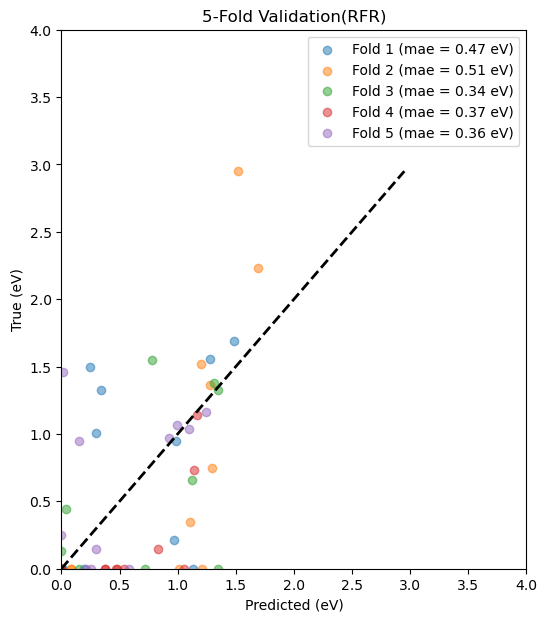

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
model =  RandomForestRegressor(n_estimators=9)
scores = []
cv = KFold(n_splits=5, shuffle=True, random_state=1)
fig = plt.figure(figsize=(6,7))
i = 1
for train, test in cv.split(X_train, y_train):
    model.fit(scaX_train[train],
                 y_train[train])
    prediction = abs(model.predict(X_train[test]))
    true = y_train[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=1, alpha=0.5, 
                label='Fold %d (mae = %0.2f eV)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted (eV)')
plt.ylabel('True (eV)')
plt.title('5-Fold Validation(RFR)')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()
plt.savefig('newRF_5foldVal.png')
plt.show()


In [7]:
params = {'n_estimators': np.arange(1,500,1)}
search = GridSearchCV(RandomForestRegressor(), param_grid = params, cv = 5,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True )
search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 499 candidates, totalling 2495 fits


{'n_estimators': 29}

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rf = RandomForestRegressor(n_estimators=29)
rf.fit(X_train,y_train)
y_pred = (rf.predict(X_test))
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [10]:
mse, mae, rmse

(0.17211756412434162, 0.33876847290640383, 0.41487053899299914)